<a href="https://colab.research.google.com/github/MohibUllahKhanSherwani/ml_projects/blob/main/Calories%20burnt%20prediction%20using%20XGBoost%20Regressor%20Model/Calories_burnt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [30]:
calories = pd.read_csv('/content/calories.csv')
exercise = pd.read_csv('/content/exercise.csv')

In [31]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [32]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [33]:
exercise.shape

(15000, 8)

In [34]:
calories.shape

(15000, 2)

In [35]:
exercise.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [36]:
calories.isnull().sum()

,0
User_ID,0
Calories,0


In [37]:
df = pd.concat([exercise, calories['Calories']], axis = 1)

In [38]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: xlabel='Gender', ylabel='count'>

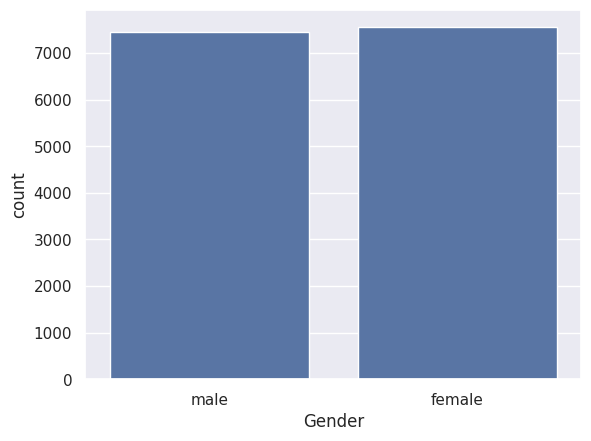

In [39]:
sns.countplot(x = df['Gender'])

<Axes: >

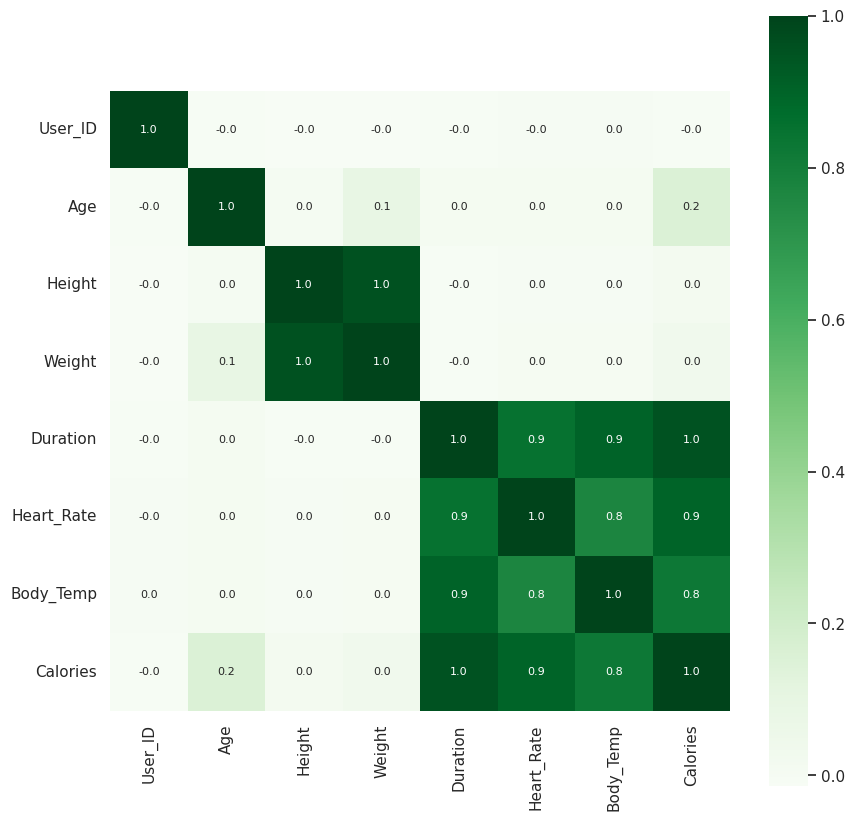

In [40]:
z = df.drop('Gender', axis = 1)
correlation = z.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, annot = True, cbar = True, cmap = 'Greens', square = True,
            annot_kws={'size':8}, fmt = '.1f')

In [41]:
df.replace({'Gender': {'male': 0, 'female': 1}}, inplace = True)

<ipython-input-41-5fc1f398d5a6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender': {'male': 0, 'female': 1}}, inplace = True)


In [42]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [43]:
df['Gender'].value_counts()

,count
Gender,
1,7553
0,7447


In [45]:
x = df.drop(columns = ['Calories', 'User_ID'], axis = 1)
y = df['Calories']

In [46]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [47]:
y

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
...,...
14995,45.0
14996,23.0
14997,75.0
14998,11.0


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [49]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [50]:
model = XGBRegressor()

In [51]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
test_prediction = model.predict(x_test)

In [60]:
error = metrics.mean_absolute_error(y_test, test_prediction)
print('Error score: ', error)

Error score:  1.4833678883314132


In [59]:
train_prediction = model.predict(x_train)
error = metrics.mean_absolute_error(y_train, train_prediction)
print('Error score: ', error)

Error score:  0.9322033420062313
